In [103]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)

In [104]:
df = pd.read_csv("E:\SE project\Bengaluru_House_Data.csv")

In [105]:
df.head() #Returns the first 5 rows of the dataframe

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [106]:
df.shape  #Returns (no.of rows x no.of columns) in the dataframe

(13320, 9)

In [107]:
df1 = df.drop(['area_type' , 'society' , 'balcony' , 'availability'],axis='columns')

In [108]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data cleaning

In [109]:
df1.isnull().sum()  #Returns the count of the NA values in each column of the dataframe

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [110]:
df2 = df1.dropna()   #Removes all the NA values from the dataframe
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [111]:
df2.shape   # Initially it was (13320, 9). Now it changed. 74

(13246, 5)

In [112]:
df2['size'].unique()  #Return all the unique values from the 'size' column.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [113]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\NITESH RAJ\AppData\Local\Temp\ipykernel_13676\2499240759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


In [114]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [115]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [116]:
df2[df2['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [117]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [118]:
def is_float(a):
    try:
        float(a)
    except:
        return False
    return True

In [119]:
df2[~df2['total_sqft'].apply(is_float)].head(10) #Returns the rows where the 'total_sqft' is not in float format

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [120]:
def sqft_to_float(x):
    l=x.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(x)
    except:
        return None

In [121]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_float)
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [122]:
df3.shape

(13246, 6)

# Feature Engineering

In [123]:
df4 = df3.copy()
df4['Price_per_sqft'] = (df4['price']/df4['total_sqft'])*100000

In [124]:
df4.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [125]:
#Exploring the location column
df4['location'].nunique() #Returns the number of unique items in the column

1304

In [126]:
df4.location = df4.location.apply(lambda x : x.strip())

location_details = df4.groupby('location')['location'].agg('count').sort_values(ascending=True)

In [127]:
location_details

location
1 Annasandrapalya      1
Kudlu Village,         1
Kumbhena Agrahara      1
Kuvempu Layout         1
LIC Colony             1
                    ... 
Thanisandra          236
Kanakpura Road       266
Electronic City      304
Sarjapur  Road       392
Whitefield           535
Name: location, Length: 1293, dtype: int64

In [128]:
len(location_details[location_details <= 10])

1052

In [129]:
location_details_less_than_10 = location_details[location_details <= 10]
location_details_less_than_10

location
1 Annasandrapalya       1
Kudlu Village,          1
Kumbhena Agrahara       1
Kuvempu Layout          1
LIC Colony              1
                       ..
Kalkere                10
Naganathapura          10
Sector 1 HSR Layout    10
Basapura               10
BTM 1st Stage          10
Name: location, Length: 1052, dtype: int64

In [130]:
df4['location'] = df4['location'].apply(lambda x : 'other' if x in location_details_less_than_10 else x)

In [131]:
len(df4.location.unique())

242

In [132]:
df4.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Outlier Detection and Removal

In [157]:
#Exploring beedroom feature
df4[df4['total_sqft']/df4['bhk'] < 300 ].head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [158]:
df5 = df4[~(df4['total_sqft']/df4['bhk'] < 300 )]
df5.shape

(12502, 7)

In [159]:
df5['Price_per_sqft'].describe()  #Gives the statistics for the particular column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [160]:
# Observe the max and min values of this above column.With that min value , we can't buy a house in Bengaluru.
# Even the max value will be considered as outlier because we are trying to build a generic model 

In [161]:
# To have a normal distribution , around 68% data points should lie between mean and onre standard deviation.

In [162]:
#function to remove Price_per_sqft outliers per location
def remove_Price_per_sqft_outliers(df):
    final_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf['Price_per_sqft'])
        s=np.std(subdf['Price_per_sqft'])
        new_df = subdf[(subdf['Price_per_sqft'] > (m-s)) & (subdf['Price_per_sqft'] <= (m+s))]
        final_df = pd.concat([final_df,new_df],ignore_index=True)
    return final_df

In [163]:
df6 = remove_Price_per_sqft_outliers(df5)
df6.shape

(10241, 7)

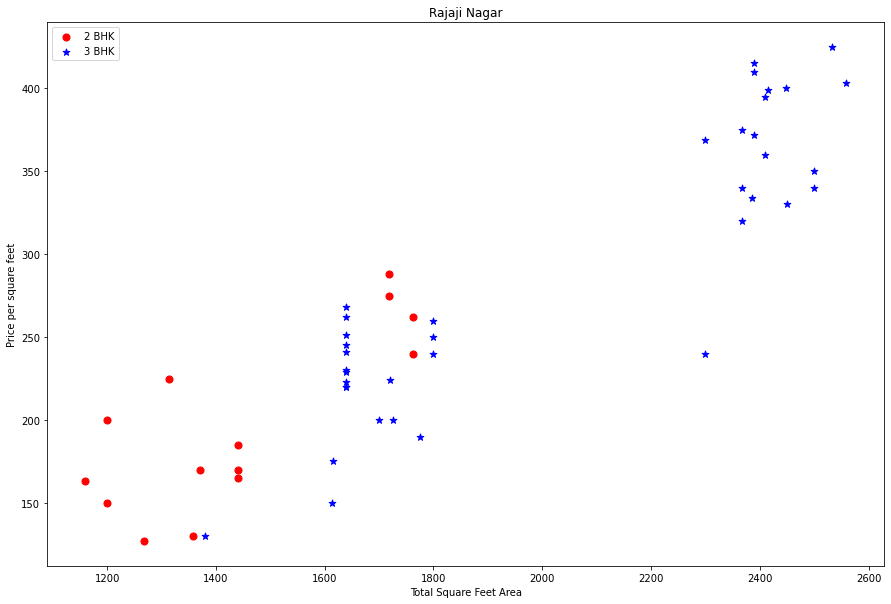

In [164]:
def scatter_chart_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color ='blue',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    
scatter_chart_plot(df6,'Rajaji Nagar')

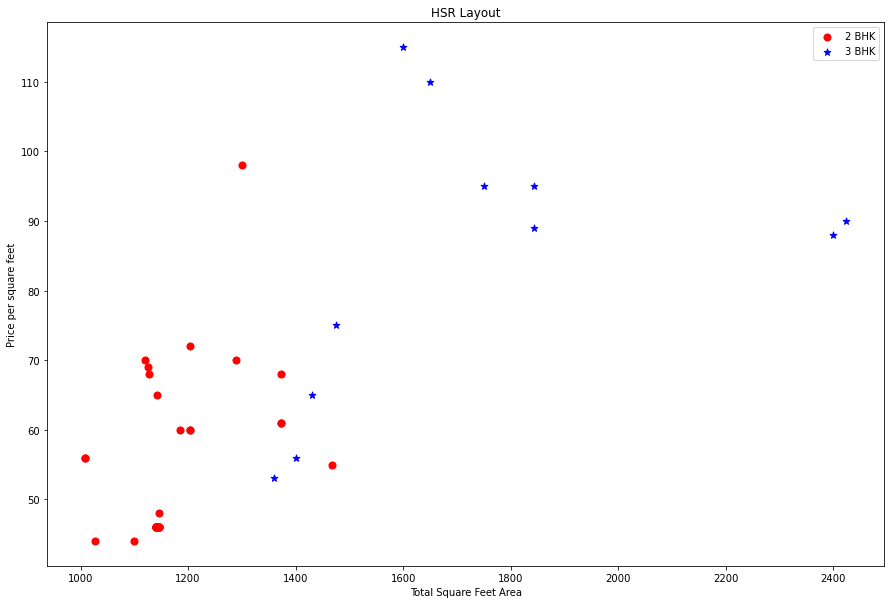

In [165]:
scatter_chart_plot(df6,'HSR Layout')

In [166]:
#Now we have to remove the 2 BHK apartments whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_sqft),
                'std' : np.std(bhk_df.Price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')      

In [167]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

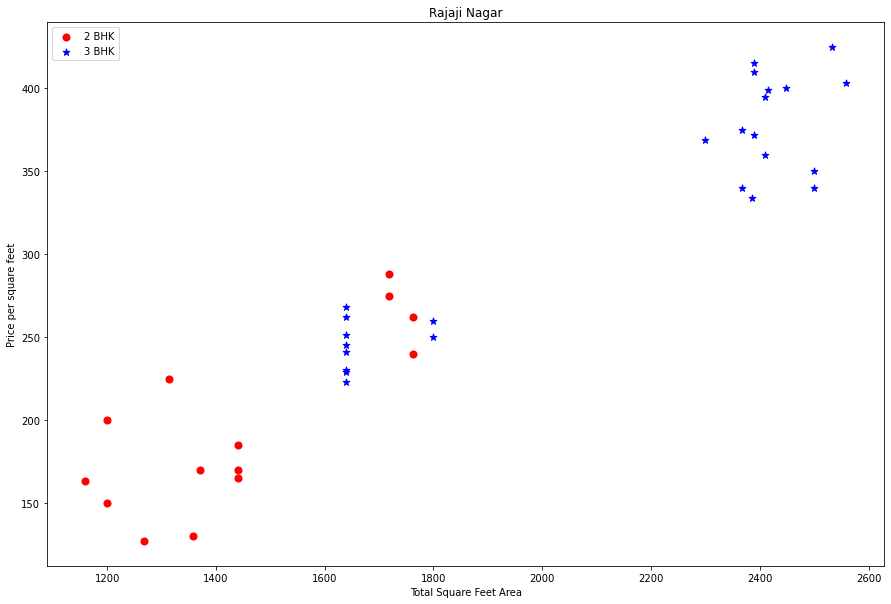

In [168]:
scatter_chart_plot(df7,'Rajaji Nagar')

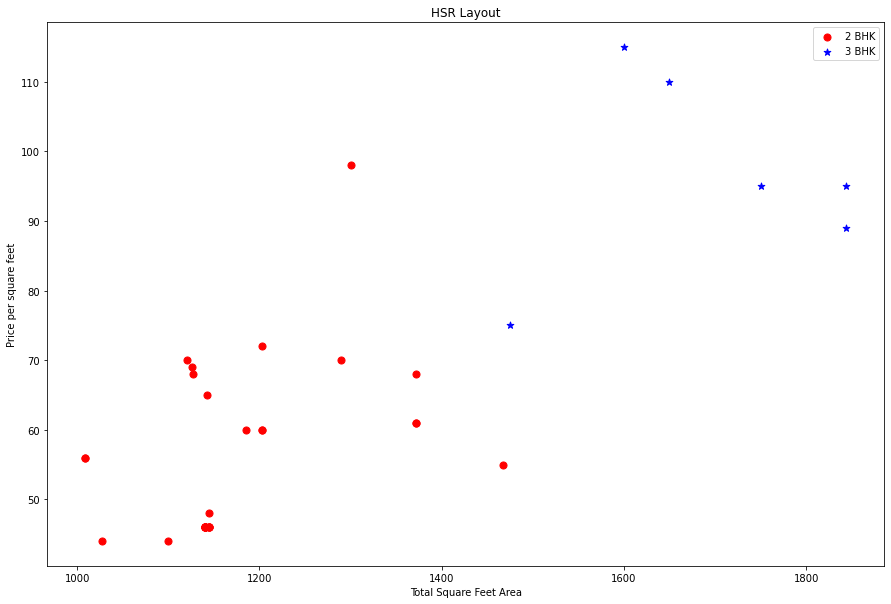

In [169]:
scatter_chart_plot(df7,'HSR Layout')

Text(0, 0.5, 'count')

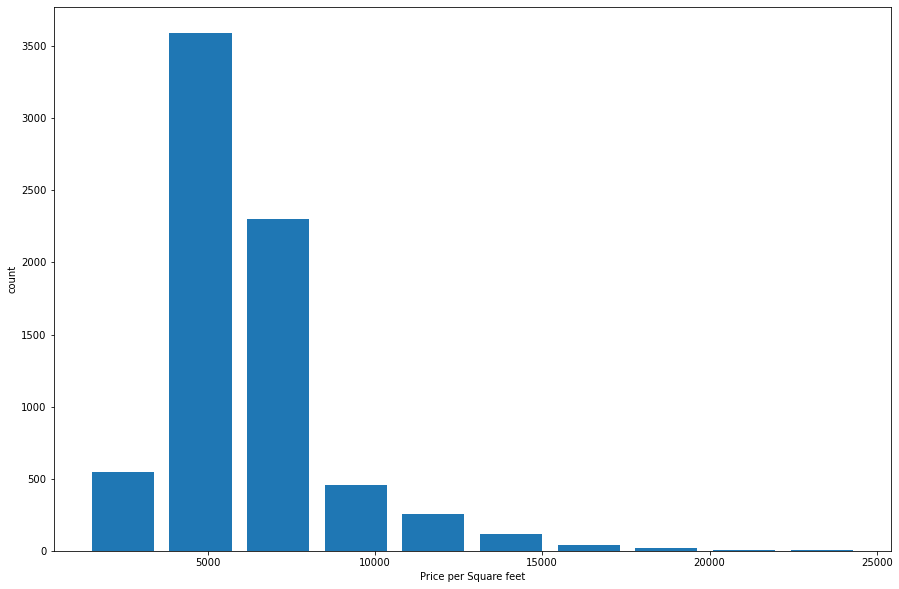

In [170]:
#How many properties I have per_sqft area
plt.hist(df7['Price_per_sqft'],rwidth=0.8)
plt.xlabel("Price per Square feet")
plt.ylabel('count')

In [171]:
#Now let us explore the bathroom feature
df7['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [172]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

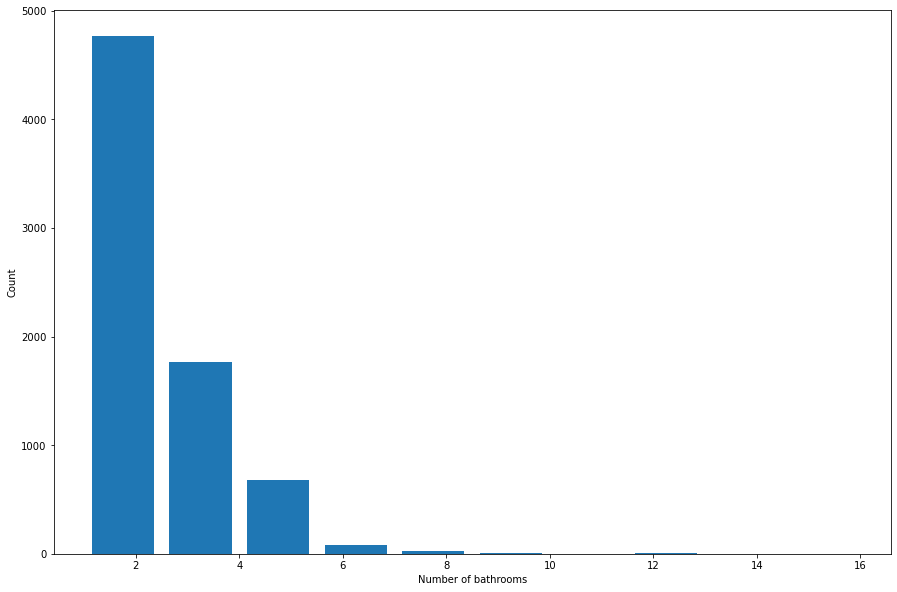

In [174]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [176]:
#Now , after discussing with the business manager we will consider the data points with (no.of bathrooms > no.of bedrooms+2) as an outlier

df7[df7['bath']>df7['bhk']+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [180]:
df8 = df7[df7['bath']<df7['bhk']+2]
df8

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [183]:
# Now for making a pridective machine learning model , we have to remove the unnecessary columns from the dataframe
df9 = df8.drop(['size','Price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Model Building

In [187]:
# Since the location column is a text column , we have to convert it into a numeric column by using "ONEHOT ENCODING"
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
#To avoid a dummies variable trap , we can operate with one column dropping
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
#Now we can drop the location column
df11=df10.drop('location',axis='columns')
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df11.shape

(7251, 245)

In [192]:
X = df11.drop('price',axis='columns')  #All the independent variables
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
y=df11['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [195]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [196]:
model.score(X_test,y_test)

0.845227769787429

In [197]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [201]:
cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
cross_val_score(LinearRegression(),X,y,cv = cross_validation)

array([0.85224556, 0.80672732, 0.77390009, 0.83513022, 0.77933247])

In [208]:
# Not only linear regression , we have other regressions like lasso regression and decision tree regression
# We can try all the  different algorithms and find which algorithm will give the best score
# For that we will use meathod called GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
             'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cross_validation, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })
    return pd.DataFrame(scores,columns=['model','best_params','best_score'])   

In [209]:
best_model(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_params,best_score
0,linear_regression,{'normalize': True},0.834044
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.681416
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.729349


In [212]:
# So , from the above scores , we can conclude that Linear Regression model is the best model because of the high score
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [215]:
def predict_price(location , sqft , bath ,bhk):
    location_index = np.where(X.columns == location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if location_index>=0:
        x[location_index] = 1
        
    return model.predict([x])[0]

In [216]:
predict_price('1st Phase JP Nagar',1000,2,5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.18041347898674

In [218]:
predict_price('1st Phase JP Nagar',1000,2,6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.40753571474093

In [219]:
# Now we will export this into a pickle file

import pickle
with open('Bengaluru_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [221]:
import json
columns = {
    'data_columns': [c.lower() for c in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))